In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from implem import *
import gzip
import feather
from tqdm import tqdm

In [2]:
df_channels = pd.read_csv('DATA/df_channels_en.tsv', sep='\t')
df_timeseries = pd.read_csv('DATA/df_timeseries_en.tsv', sep='\t')

In [3]:
df = feather.read_dataframe("DATA/yt_metadata_helper.feather")

In [ ]:
df.head()


,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


In [4]:

import pandas as pd
import gzip

fichier_gz = 'DATA/youtube_comments.tsv.gz'

nombre_lignes_a_extraire = 100000000

# Utilisez gzip pour décompresser le fichier
with gzip.open(fichier_gz, 'rt', encoding='utf-8') as f:
    # Utilisez pandas pour charger le fichier TSV dans un DataFrame
    df_comm = pd.read_csv(f, sep='\t', nrows=nombre_lignes_a_extraire)

# Affichez les premières lignes du DataFrame pour vérifier
print(df_comm)


i
           author     video_id  likes  replies
0               1  Gkb1QMHrGvA      2        0
1               1  CNtp0xqoods      0        0
2               1  249EEzQmVmQ      1        0
3               1  _U443T2K_Bs      0        0
4               1  rJbjhm0weYc      0        0
...           ...          ...    ...      ...
99999995  6695123  YlTNoJwRQak      3        0
99999996  6695123  ESKmRiLjNpg      0        0
99999997  6695123  DkdadDbyRZ4      1        0
99999998  6695123  g6OacoeIizk     86        0
99999999  6695123  g6OacoeIizk     35        0

[100000000 rows x 4 columns]


In [6]:
print(df_comm.columns)


Index(['author', 'video_id', 'likes', 'replies'], dtype='object')


In [7]:
df_comm = df_comm.rename(columns={'video_id': 'display_id'})


In [8]:
df_comm = df_comm.rename(columns={'video_id': 'display_id'})
df_merged = pd.merge(df_comm, df, on='display_id', how='left')
print(df_merged)


           author   display_id  likes  replies       categories  \
0               1  Gkb1QMHrGvA      2        0   People & Blogs   
1               1  CNtp0xqoods      0        0    Entertainment   
2               1  249EEzQmVmQ      1        0    Entertainment   
3               1  _U443T2K_Bs      0        0           Comedy   
4               1  rJbjhm0weYc      0        0   People & Blogs   
...           ...          ...    ...      ...              ...   
99999995  6695123  YlTNoJwRQak      3        0    Entertainment   
99999996  6695123  ESKmRiLjNpg      0        0  News & Politics   
99999997  6695123  DkdadDbyRZ4      1        0            Music   
99999998  6695123  g6OacoeIizk     86        0    Entertainment   
99999999  6695123  g6OacoeIizk     35        0    Entertainment   

                        channel_id  dislike_count  duration  like_count  \
0         UCBXNpF6k2n8dsI6nBH8q4sQ         7708.0       478     85133.0   
1         UCpB959t8iPrxQWj7G6n0ctQ         18

In [9]:
df_merged.to_csv('mergedmetadatacomments.csv', index=False)


In [10]:
df_mergedmin = df_merged.loc[:, ['display_id', 'author', 'replies','likes','categories']]
print(df_merged.head())


   author   display_id  likes  replies      categories  \
0       1  Gkb1QMHrGvA      2        0  People & Blogs   
1       1  CNtp0xqoods      0        0   Entertainment   
2       1  249EEzQmVmQ      1        0   Entertainment   
3       1  _U443T2K_Bs      0        0          Comedy   
4       1  rJbjhm0weYc      0        0  People & Blogs   

                 channel_id  dislike_count  duration  like_count upload_date  \
0  UCBXNpF6k2n8dsI6nBH8q4sQ         7708.0       478     85133.0  2019-06-01   
1  UCpB959t8iPrxQWj7G6n0ctQ         1859.0       815    111451.0  2019-04-06   
2  UCpB959t8iPrxQWj7G6n0ctQ         1643.0       697     84571.0  2019-09-15   
3  UCM2ERkgV3P1_6MAyxa51rxA         3287.0       990     41195.0  2019-08-03   
4  UCtwD0AlYSlAYv7eXu8UxtEg         1740.0       603     18827.0  2019-09-11   

   view_count  
0  11659189.0  
1   3807677.0  
2   2679538.0  
3   1235364.0  
4    914335.0  


In [1]:
import matplotlib.pyplot as plt

df_mergedmin.groupby('categories')['replies'].sum().plot(kind='bar')
plt.title('Number of Replies by Category')
plt.xlabel('Category')
plt.ylabel('Number of Replies')
plt.show()


NameError: name 'df_mergedmin' is not defined

In [ ]:
df_yt = df

In [ ]:
df_channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [ ]:
print(df_yt)

                categories                channel_id  dislike_count  \
0         Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA            1.0   
1         Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA            1.0   
2         Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA          779.0   
3         Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA           24.0   
4         Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA           13.0   
...                    ...                       ...            ...   
72924789   News & Politics  UCrwE8kVqtIUVUzKui2WVpuQ            3.0   
72924790   News & Politics  UCrwE8kVqtIUVUzKui2WVpuQ            0.0   
72924791   News & Politics  UCrwE8kVqtIUVUzKui2WVpuQ            2.0   
72924792   News & Politics  UCrwE8kVqtIUVUzKui2WVpuQ            0.0   
72924793   News & Politics  UCrwE8kVqtIUVUzKui2WVpuQ           31.0   

           display_id  duration  like_count upload_date  view_count  
0         SBqSc91Hn9g      1159         8.0  2016-09-28      1057.0  
1      

In [ ]:
df_timeseries.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [ ]:
num_channels = df_channels.shape[0]
print(f"The number of channels in df_channels is {num_channels}")
last_datetimes = df_timeseries.groupby('channel')['datetime'].max()
datatotreat = last_datetimes[last_datetimes==last_datetimes.max()]
datatotreat.shape


The number of channels in df_channels is 136470


(22622,)

In [ ]:
import random
import tqdm

ratios = []
for category in df_channels['category_cc'].unique():
    channels = df_channels[df_channels['category_cc'] == category]['channel'].tolist()
    random.shuffle(channels)
    channels = channels[:50]
    for channel_id in tqdm.tqdm(channels):
        channel_views = df_yt[df_yt['channel_id'] == channel_id]['view_count'].sum()
        subscribers_cc = df_channels[df_channels['channel'] == channel_id]['subscribers_cc'].iloc[0]
        ratio = channel_views / subscribers_cc
        ratios.append({'channel': channel_id, 'category_cc': category, 'ratio': ratio})

df_ratios = pd.DataFrame(ratios)
print(df_ratios)


100%|██████████| 50/50 [02:16<00:00,  2.72s/it]
0it [00:00, ?it/s]

                      channel      category_cc       ratio
0    UCZmiunWACQomHiwsY3Mj18g           Gaming   51.357554
1    UCGkoUWS076mYTKENlzoeemQ           Gaming   66.305163
2    UCfH51_x32-6Z-dVPf0VXiIA           Gaming  596.185634
3    UCNEi0_jIHwws4aAroPmg9Ug           Gaming   42.184669
4    UCa69zLgwJXtdVWlb-e9g76g           Gaming  159.824167
..                        ...              ...         ...
745  UCCzZCAUdaaVCAnEBThIuzLQ  Travel & Events  387.880394
746  UC7b72jc4v1oDtRJFofrXT4g  Travel & Events  154.115128
747  UCJHPYNnaqZftejFxADEqhbA  Travel & Events  101.380309
748  UCqO0nULThTlC83l5OFHlEOg  Travel & Events  675.136060
749  UCO7OYEkCf_OV-EiBesZt-Tw  Travel & Events  197.207137

[750 rows x 3 columns]


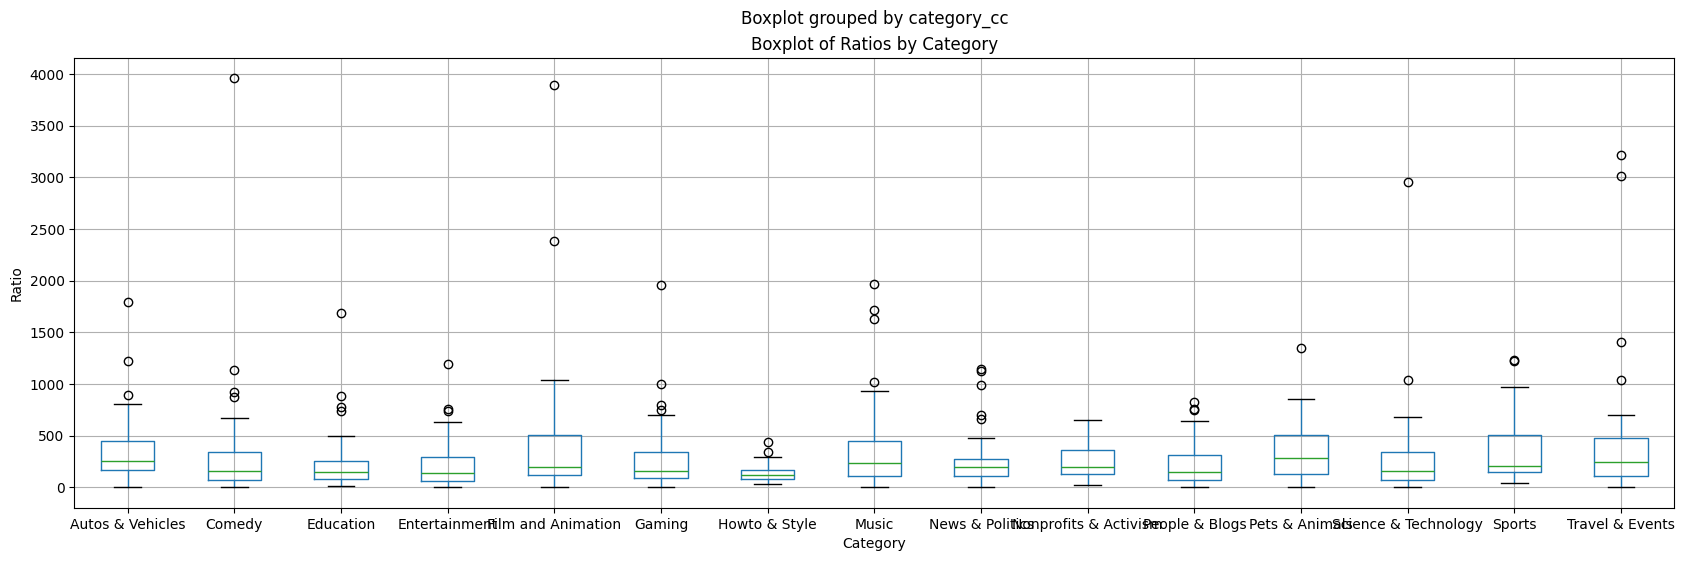

In [ ]:
import matplotlib.pyplot as plt

df_ratios.boxplot(column='ratio', by='category_cc', figsize=(20, 6))
plt.title('Boxplot of Ratios by Category')
plt.xlabel('Category')
plt.ylabel('Ratio')
plt.show()


In [ ]:
channel_id = 'UC--3c8RqSfAqYBdDjIG3UNA'


In [ ]:
channel_videos = get_channel_video_timeseries(channel_id, df_yt)
print(channel_videos)

         categories                channel_id  dislike_count   display_id  \
70429342     Sports  UC--3c8RqSfAqYBdDjIG3UNA           12.0  adE-IgADBAs   
70429343     Sports  UC--3c8RqSfAqYBdDjIG3UNA          283.0  tB8TkfwLxrY   
70429344     Sports  UC--3c8RqSfAqYBdDjIG3UNA           17.0  Xp3u-bAmowE   
70429345     Sports  UC--3c8RqSfAqYBdDjIG3UNA           10.0  NM5ZDS_6GXs   
70429346     Sports  UC--3c8RqSfAqYBdDjIG3UNA           56.0  TLR9mMS41A8   
...             ...                       ...            ...          ...   
70429670     Sports  UC--3c8RqSfAqYBdDjIG3UNA            5.0  xQDy_DKWObY   
70429671     Sports  UC--3c8RqSfAqYBdDjIG3UNA            5.0  vvYtjAGQqKw   
70429672     Sports  UC--3c8RqSfAqYBdDjIG3UNA            5.0  pieax12_-iQ   
70429673     Sports  UC--3c8RqSfAqYBdDjIG3UNA           36.0  zMOyWqIcIfU   
70429674     Sports  UC--3c8RqSfAqYBdDjIG3UNA            2.0  TColWGMLaoE   

          duration  like_count upload_date  view_count  
70429342       434

In [ ]:
from datetime import datetime
channel_data = df_timeseries.loc[df_timeseries['channel'] == channel_id]
channel_data = channel_data.sort_values('datetime', ascending=False)
for currentdate in channel_data['datetime']:
    date_int = intdate(currentdate)
    print(currentdate - pd.offsets.Day(1))
    print(currentdate, str(nextdate))
    videos = channel_videos[(channel_videos['upload_date'] >= currentdate) & (channel_videos['upload_date'] < nextdate)]


TypeError: unsupported operand type(s) for -: 'str' and 'pandas._libs.tslibs.offsets.Day'

In [ ]:
channel_data = df_timeseries.loc[df_timeseries['channel'] == channel_id]
channel_data = channel_data.sort_values('datetime', ascending=False)
print(channel_data.values)

[['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-09-30 01:00:00'
  57987117.29166666 468101.5486111121 75220.23809523809
  1079.2658730158728 333 1 3]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-09-23 01:00:00'
  57519015.74305555 674420.8333333285 74140.97222222223
  1283.3333333333285 332 2 5]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-09-16 01:00:00'
  56844594.90972222 801905.6719771251 72857.63888888889 2262.749183006541
  330 3 4]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-09-09 01:00:00'
  56042689.23774511 899867.7058823556 70594.88970588235 3015.352941176461
  327 1 3]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-09-02 01:00:00'
  55142821.53186274 892801.6806722656 67579.53676470589 3012.498074229697
  326 2 5]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-08-26 01:00:00'
  54250019.85119048 848255.0 64567.03869047619 2994.5 324 3 5]
 ['UC--3c8RqSfAqYBdDjIG3UNA' 'Sports' '2019-08-19 01:00:00'
  53401764.85119048 803831.252976194 61572.53869047619 2840.208333333336
  321 2 3]
 ['UC-